In [1]:
%config IPCompleter.greedy=True


In [2]:
import itertools
import numpy as np
from Bio import Align
from Bio import SeqIO
from Bio import pairwise2
from Bio.SubsMat.MatrixInfo import blosum62
import csv
import pandas as pd
from Bio.SeqRecord import SeqRecord

# Reading Interacting lncRNAs

In [18]:
df_nc_seq= pd.read_csv('../Data/NpInter2 Interacting LncRNAs/NP_V2_LncRNAsSequences_clean2.csv')
df_nc_seq.shape

(1923, 14)

In [61]:
df_nc_seq.head(5)

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1    nncid    accn      class  \
0           0          1110          342079  n344453   NULL    lincRNA    
1           1          1111          342080  n344454   NULL    lincRNA    
2           2          1112          342081  n344455   NULL    lincRNA    
3           3          1113          342083  n344457   NULL    lincRNA    
4           4          1114          342086  n344460   NULL    lincRNA    

         organism             name  \
0   Homo sapiens    Human lincRNA    
1   Homo sapiens    Human lincRNA    
2   Homo sapiens    Human lincRNA    
3   Homo sapiens    Human lincRNA    
4   Homo sapiens    Human lincRNA    

                                          ref  transcriptID     url  cpcScore  \
0   Scripture Reconstruction LincRNAs By Luo    linc_luo_1    NULL   -1.48162   
1   Scripture Reconstruction LincRNAs By Luo    linc_luo_2    NULL   -1.29125   
2   Scripture Reconstruction LincRNAs By Luo    linc_luo_3    NULL   -1.27104   
3   Scripture Reconstruction LincRNAs By Luo    linc_luo_5    NULL   -1.36124   
4   Scripture Reconstruction LincRNAs By Luo    linc_luo_8    NULL   -1.30821   

       cnci                                           sequence  
0 -0.211334  TCTCGCTCTGTCACCCAGGCTGGAGTGCAGTGGCGTGATCTCGGCT...  
1 -0.390813  ATTGTTAACGGCTGCGGTTCGAAGTGGCTGTGGGTATTGCTGCGGC...  
2 -0.166314  AAATGAGGATGAAGCCAAGTGTTTGGAGTTCTTGCGAAGAAAGATA...  
3 -0.309593  GGCCGGAGAGGCAGCAGCACCCCGAGCTGTCAGGCGTTCCGCCGCG...  
4 -0.336347  AAGGTGGACTAGACAAAGTTGTATCTAGACCCTTATCATATATGTG...

# Reading interacting proteins

In [62]:
df_p_seq = pd.read_csv('..\Data\\NpInter2 Interacting Protiens\\Np_pSeq_26_1923.csv')
df_p_seq.shape

(25, 4)

In [116]:
df_p_seq.head()

Entry                                           Sequence  \
0  Q07955  MSGGGVIRGPAGNNDCRIYVGNLPPDIRTKDIEDVFYKYGAIRDID...   
1  Q01844  MASTDYSTYSQAAAQQGYSAYTAQPTQGYAQTTQAYGQQSYGTYGQ...   
2  Q9UL18  MEAGPSGAAAGAYLPPLQQVFQAPRRPGIGTVGKPIKLLANYFEVD...   
3  Q9UKV8  MYSGAGPALAPPAPPPPIQGYAFKPPPRPDFGTSGRTIKLQANFFE...   
4  Q9H9G7  MEIGSAGPAGAQPLLMVPRRPGYGTMGKPIKLLANCFQVEIPKIDV...   

                               Cross-reference (PDB)   Entry name  
0                     1X4A;2M7S;2M8D;2O3D;3BEG;4C0O;  SRSF1_HUMAN  
1                                              2CPE;    EWS_HUMAN  
2                     1SI2;1SI3;4KRE;4KRF;4KXT;5W6V;   AGO1_HUMAN  
3  3LUC;3LUD;3LUG;3LUH;3LUJ;3LUK;3QX8;3QX9;4F3T;4...   AGO2_HUMAN  
4                                              5VM9;   AGO3_HUMAN

# Reading np inter v 2 interactions

In [67]:
df_NPInter2 = pd.read_csv('../data/NPInter_v2.0 homo_sapiens.csv')
df_NPInter2.shape

(8947, 17)

In [68]:
df_NPInter2.head(5)

interID   ncID   ncType ncIdentifier         ncName  PartnerID  \
0  ncRI-199556  16426  NONCODE      n386623  RPI001_920445      18387   
1  ncRI-188304  11160  NONCODE      n343050  RPI001_100097       8360   
2  ncRI-192633  12013  NONCODE      n407114  RPI001_182337       3988   
3  ncRI-191389  11713  NONCODE      n408119  RPI001_114723        515   
4  ncRI-191389  11713  NONCODE      n408119  RPI001_114723        515   

    prType prIdentifier InteractionPartner  \
0  UniProt       Q07955              SRSF1   
1  UniProt       Q9HCE1              MOV10   
2  UniProt       Q01844              EWSR1   
3  UniProt       Q9UL18             AGO1-4   
4  UniProt       Q9UKV8             AGO1-4   

                                    interDescription         experiment  \
0  Cross-linking immunoprecipitation and high-thr...           CLIP-seq   
1  A modified PAR-CLIP method applied to the nucl...  modified PAR-CLIP   
2  PAR-CLIP defined global RNA targets for all hu...           PAR-CLIP   
3  PAR-CLIP of combined AGO1-4 indicates the nonc...           PAR-CLIP   
4  PAR-CLIP of combined AGO1-4 indicates the nonc...           PAR-CLIP   

     pubmed      organism                    tag interClass   interLevel  \
0  19116412  Homo sapiens  ncRNA-protein binding    binding  RNA-Protein   
1  22844102  Homo sapiens  ncRNA-protein binding    binding  RNA-Protein   
2  22081015  Homo sapiens  ncRNA-protein binding    binding  RNA-Protein   
3  20371350  Homo sapiens  ncRNA-protein binding    binding  RNA-Protein   
4  20371350  Homo sapiens  ncRNA-protein binding    binding  RNA-Protein   

  NONCODETranscriptID  
0     NONHSAT012864.2  
1     NONHSAT084827.2  
2     NONHSAT091509.2  
3                 NaN  
4                 NaN

In [69]:
#df_np_pair.nunique()

### split Pandas Dataframe cells containing lists into multiple rows, duplicating the other column's values.

In [28]:
df_NPInter2.nunique()

interID                8128
ncID                   3051
ncType                    1
ncIdentifier           3053
ncName                 3052
PartnerID               151
prType                    1
prIdentifier            139
InteractionPartner      153
interDescription        192
experiment               33
pubmed                  140
organism                  1
tag                       1
interClass                1
interLevel                1
NONCODETranscriptID    2086
dtype: int64

In [30]:
# df_NPInter3 = \
# (df_NPInter3.set_index(df_NPInter3.columns.drop('prIdentifier',1).tolist())
#    .prIdentifier.str.split(';', expand=True)
#    .stack()
#    .reset_index()
#    .rename(columns={0:'prIdentifier'})
#    .loc[:, df_NPInter3.columns]
# )
# df_NPInter3.shape

In [29]:
# df_NPInter3.nunique()

In [32]:
# df_NPInter3=df_NPInter3[~df_NPInter3.ncIdentifier.isin(['Q14684','MIMAT0000427'])]

In [33]:
# df_NPInter3.to_csv('..\Data\\NPInter_v2.0 homo_sapiens.csv')

In [31]:
# df_NPInter3.nunique()

In [34]:
# m = df_p_seq.Entry.isin(df_NPInter2.prIdentifier)
# df_p_seq[m]

In [75]:
# read protein similarites
df_pr_sim = pd.read_csv('../Data/NpInter2 Interacting Protiens/Protein-Protein Sequence Similarity/Protien-Protien_Similarity_26_1923.csv')
df_pr_sim.nunique()

Query_Seq_ID        25
Target_Seq_ID       25
Align_Score        190
Normalize_Score     30
Identity           283
Similarity         289
dtype: int64

In [54]:
# reading interacting pairs
#df_interact_pairs = pd.read_csv("../data/NpInter2 Interacting Protiens/NPInter_pairs.csv")
#df_interact_pairs.shape

In [76]:
df_pr_sim['Query_Seq_ID'].unique()

array(['Q07955', 'Q01844', 'Q9UL18', 'Q9UKV8', 'Q9H9G7', 'Q9HCK5',
       'Q15717', 'B7ZL34', 'Q9NZI8', 'P26599', 'O00425', 'P35637',
       'P31483', 'Q9HCE1', 'Q86X94', 'Q49AS9', 'Q13148', 'Q9Y6M1',
       'Q96PU8', 'O43251', 'Q8NDV7', 'Q9UPQ9', 'Q9HCJ0', 'Q13285',
       'Q6PJX3'], dtype=object)

In [65]:
df_p_seq.Entry.unique()

array(['Q07955', 'Q01844', 'Q9UL18', 'Q9UKV8', 'Q9H9G7', 'Q9HCK5',
       'Q15717', 'B7ZL34', 'Q9NZI8', 'P26599', 'O00425', 'P35637',
       'P31483', 'Q9HCE1', 'Q86X94', 'Q49AS9', 'Q13148', 'Q9Y6M1',
       'Q96PU8', 'O43251', 'Q8NDV7', 'Q9UPQ9', 'Q9HCJ0', 'Q13285',
       'Q6PJX3'], dtype=object)

In [55]:
#df_interact_pairs.head(5)

In [56]:
#df_NPInter3 =pd.read_csv('..\Data\\NPInter_v2.0 homo_sapiens.csv')

In [57]:
#df_NPInter3.head(5)

In [58]:
#df_interact_pairs[df_interact_pairs.nncid.isin(df_NPInter3.ncIdentifier)].nunique()

In [59]:
#df_interact_pairs[df_interact_pairs.PrId.isin(df_NPInter3.prIdentifier)].nunique()

In [60]:
#df_interact_pairs125.head(5)

In [122]:
df_NPInter2[df_NPInter2.ncIdentifier.isin(df_nc_seq.nncid)].nunique()

interID                4895
ncID                   1924
ncType                    1
ncIdentifier           1923
ncName                 1924
PartnerID                22
prType                    1
prIdentifier             26
InteractionPartner       22
interDescription         24
experiment                7
pubmed                   14
organism                  1
tag                       1
interClass                1
interLevel                1
NONCODETranscriptID    1311
dtype: int64

In [88]:
df_np2 = pd.read_csv("E:/Fast/Maam Zoya/data and code/NPInter_V2.csv",encoding='latin-1')
df_np2.shape

(201107, 16)

In [89]:
df_np2=df_np2[df_np2.ncIdentifier.isin(df_nc_seq.nncid)]
df_np2.shape

(4903, 16)

In [94]:
df_np2 = \
(df_np2.set_index(df_np2.columns.drop('prIdentifier',1).tolist())
   .prIdentifier.str.split(';', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'prIdentifier'})
   .loc[:, df_np2.columns]
)
df_np2.shape

(5360, 16)

In [105]:
df_np2=df_np2[df_np2.interClass =='binding']

In [13]:
df_np2=pd.read_csv("../data/NPInter_v2.0 homo_sapiens_type_lncrna.csv")

In [14]:
df_np2.nunique()

interID               4895
ncID                  1924
ncType                   1
ncIdentifier          1923
ncName                1924
PartnerID               22
prType                   1
prIdentifier            26
InteractionPartner      22
interDescription        24
experiment               7
pubmed                  14
organism                 1
tag                      1
interClass               1
interLevel               1
dtype: int64

In [142]:
# df_NPInter10412 = pd.read_csv("../data/NPInter10412_dataset.csv")
# df_NPInter10412.head(5)

In [5]:
df_p_seq.Entry.unique()

array(['Q07955', 'Q01844', 'Q9UL18', 'Q9UKV8', 'Q9H9G7', 'Q9HCK5',
       'Q15717', 'B7ZL34', 'Q9NZI8', 'P26599', 'O00425', 'P35637',
       'P31483', 'Q9HCE1', 'Q86X94', 'Q49AS9', 'Q13148', 'Q9Y6M1',
       'Q96PU8', 'O43251', 'Q8NDV7', 'Q9UPQ9', 'Q9HCJ0', 'Q13285',
       'Q6PJX3'], dtype=object)

In [6]:
import random
from random import randint
def get_interaction_pairs(df_p_seq, df_nc_seq, df_NPInter2):
    # create dict of proteins
    pro_dict=dict(zip(df_p_seq.Entry,df_p_seq.Sequence))
    # create dict of lncRnas
    lnc_dict = dict(zip(df_nc_seq.nncid,df_nc_seq.sequence))
    # positive set
    posi_set = set()
    pro_set = set()
    df_interact = pd.DataFrame(columns=['ncIdentifier', 'prIdentifier', 'interaction'])
    # geting positive class
    for index, row in df_NPInter2.iterrows():
        ncIdentifier=row['ncIdentifier'].strip()
        prIdentifier =row['prIdentifier'].strip()
        posi_set.add((ncIdentifier, prIdentifier))
        pro_set.add(prIdentifier)
        if (ncIdentifier in lnc_dict) and (prIdentifier in pro_dict):
            df_interact = df_interact.append({'ncIdentifier': ncIdentifier, 'prIdentifier': prIdentifier, 'interaction': 1}, ignore_index=True)
        else:
            print(prIdentifier)
    #getting negative data or class
    pro_list = list(pro_set)   
    total_pro_len = len(pro_list)  
    for index, row in df_NPInter2.iterrows():
        ncIdentifier=row['ncIdentifier'].strip()
        prIdentifier =row['prIdentifier'].strip()
        #posi_set.add((ncIdentifier, prIdentifier))
        for val in range(50):
                    random_choice = randint(0,total_pro_len-1)
                    select_pro = pro_list[random_choice]
                    selec_nega= (ncIdentifier, select_pro)
                    if selec_nega not in posi_set:
                        posi_set.add(selec_nega)
                        #print selec_nega
                        break
        if (ncIdentifier in lnc_dict) and (select_pro in pro_dict):
            df_interact = df_interact.append({'ncIdentifier': ncIdentifier, 'prIdentifier': select_pro, 'interaction': 0}, ignore_index=True)
        
    return df_interact
        
    


In [147]:
df_interact=get_interaction_pairs(df_p_seq, df_nc_seq, df_np2)
df_interact.shape

(10706, 3)

In [151]:
df_interact[df_interact.interaction == 1].nunique()

ncIdentifier    1923
prIdentifier      25
interaction        1
dtype: int64

In [152]:
df_interact.describe()


ncIdentifier prIdentifier  interaction
count         10706        10706        10706
unique         1923           25            2
top         n344778       Q15717            1
freq             54         1187         5353

In [7]:
df_interact = pd.read_csv('../data/NPInter2_25_1923_Pairs.csv')
df_interact.head()

ncIdentifier prIdentifier  interaction
0      n386623       Q07955            1
1      n407114       Q01844            1
2      n408119       Q9UL18            1
3      n408119       Q9UKV8            1
4      n408119       Q9H9G7            1

In [10]:
df_interact.dtypes

ncIdentifier    object
prIdentifier    object
interaction      int64
dtype: object

In [24]:
#print(df_interact.pivot(index='ncIdentifier', columns='prIdentifier', values='interaction'))
#interaction_matrix = df_interact.groupby(['ncIdentifier', 'prIdentifier']).size().unstack().fillna(0)
#interaction_matrix


In [77]:
# creating features from npinter v2

import random
from random import randint
def prepare_NPinter_feature(df_p_seq, df_nc_seq, df_NPInter2, df_pr_sim):
    # create dict of proteins
    pro_dict=dict(zip(df_p_seq.Entry,df_p_seq.Sequence))
    # create dict of lncRnas
    lnc_dict = dict(zip(df_nc_seq.nncid,df_nc_seq.sequence))
    # positive set
    posi_set = set()
    pro_set = set()
    X_features =[]
    Y_labels =[]
    df_interact = pd.DataFrame(columns=['ncIdentifier', 'prIdentifier', 'interaction'])
    # geting positive class
    for index, row in df_NPInter2.iterrows():
        ncIdentifier=row['ncIdentifier'].strip()
        prIdentifier =row['prIdentifier'].strip()
        posi_set.add((ncIdentifier, prIdentifier))
        pro_set.add(prIdentifier)
        if (ncIdentifier in lnc_dict) and (prIdentifier in pro_dict):
            df_interact = df_interact.append({'ncIdentifier': ncIdentifier, 'prIdentifier': prIdentifier, 'interaction': 1}, ignore_index=True)
            sim_lst = df_pr_sim[df_pr_sim['Query_Seq_ID']==prIdentifier]['Normalize_Score'].tolist()
            if len(sim_lst) == 0:
                print("pos: " + prIdentifier)
            X_features.append(sim_lst)
            Y_labels.append(1)

        else:
            print(prIdentifier)
    #getting negative data or class
    pro_list = list(pro_set)   
    total_pro_len = len(pro_list)  
    for index, row in df_NPInter2.iterrows():
        ncIdentifier=row['ncIdentifier'].strip()
        prIdentifier =row['prIdentifier'].strip()
        #posi_set.add((ncIdentifier, prIdentifier))
        for val in range(50):
                    random_choice = randint(0,total_pro_len-1)
                    select_pro = pro_list[random_choice]
                    selec_nega= (ncIdentifier, select_pro)
                    if selec_nega not in posi_set:
                        posi_set.add(selec_nega)
                        #print selec_nega
                        break
        if (ncIdentifier in lnc_dict) and (select_pro in pro_dict):
            df_interact = df_interact.append({'ncIdentifier': ncIdentifier, 'prIdentifier': select_pro, 'interaction': 0}, ignore_index=True)
            sim_lst = df_pr_sim[df_pr_sim['Query_Seq_ID']==select_pro]['Normalize_Score'].tolist()
            if len(sim_lst) == 0:
                print("neg: " + select_pro)
            X_features.append(sim_lst)
            Y_labels.append(0)
    return df_interact,np.array(X_features) , Y_labels

        
    


In [22]:
#sim_lst = df_pr_sim[df_pr_sim['Query_Seq_ID']=='B7ZL34']['Normalize_Score'].tolist()
#lst

In [78]:
df_interact, X_Features, Y_Labels=prepare_NPinter_feature(df_p_seq, df_nc_seq, df_np2, df_pr_sim)
df_interact.shape

(10706, 3)

In [79]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Features,Y_Labels,test_size=0.25,random_state=0)
len(X_train)

8029

In [69]:
#y_train=np.array(y_train)

In [80]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
classifier = LogisticRegression(random_state = 0) 
 

# fit the model with data
classifier.fit(X_train, y_train)

#
y_pred=classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[982, 397],
       [355, 943]], dtype=int64)

In [82]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

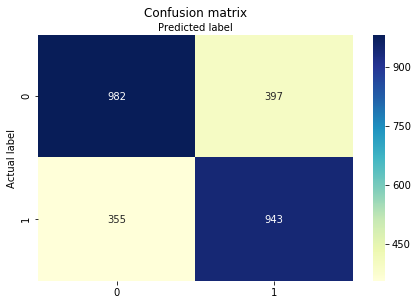

In [83]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7190885319387373
Precision: 0.7037313432835821
Recall: 0.726502311248074


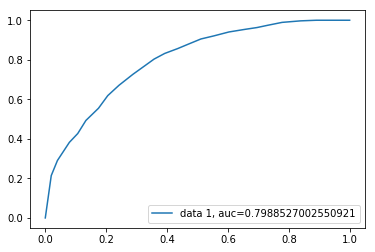

In [86]:
# ROC Curve
# Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [87]:
df_lnc_sim = pd.read_csv("../Data/NpInter2 Interacting LncRNAs/LncRNA-LncRNA Sequence Similarity/LncRNA-LncRNA_Similarity.csv")
df_lnc_sim.shape

(449338, 6)

In [88]:
df_lnc_sim.nunique()

Query_Seq_ID         344
Target_Seq_ID       1309
Align_Score        13095
Normalize_Score       73
Identity            2907
Similarity          2907
dtype: int64

In [94]:
df_nc22= pd.read_csv("../Data/NpInter2 Interacting LncRNAs/NP_V2_LncRNAsSequences_clean.csv")
df_nc22.shape

(1309, 12)

In [95]:
lst_nncid = df_nc22[df_nc22.NONCODEID.isin(df_lnc_sim['Query_Seq_ID'])].nncid.tolist()

In [96]:
len(lst_nncid)

344

In [107]:
noncode_dict=dict(zip(df_nc22.NONCODEID,df_nc22.nncid))


In [118]:
def label_nonecodeid_to_nncid (row, noncode_dict):
    if row['Query_Seq_ID'] in  noncode_dict:
        #print( noncode_dict[row['Query_Seq_ID']])
        return noncode_dict[row['Query_Seq_ID']]
    

In [116]:

df_lnc_sim['nncid'] = df_lnc_sim.apply (lambda row: label_nonecodeid_to_nncid(row,noncode_dict), axis=1)
#df_lnc_sim.nunique()

n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453


n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344453
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454
n344454


n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455
n344455


n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457
n344457


n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460
n344460


n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461
n344461


n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462
n344462


n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478
n344478


n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344488
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490
n344490


n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496
n344496


n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500
n344500


n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503
n344503


n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517
n344517


n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528
n344528


n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531
n344531


n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344538
n344540
n344540
n344540
n344540
n344540
n344540


n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541
n344541


n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547
n344547


n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551
n344551


n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552
n344552


n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569
n344569


n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574
n344574


n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578
n344578


n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585
n344585


n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588
n344588


n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589
n344589


n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601
n344601


n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610
n344610


n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612
n344612


n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627
n344627


n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638
n344638


n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644
n344644


n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649
n344649


n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651
n344651


n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652
n344652


n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656
n344656


n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658
n344658


n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659
n344659


n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664
n344664


n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667
n344667


n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677
n344677


n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678
n344678


n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679
n344679


n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691
n344691


n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693
n344693


n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695
n344695


n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699
n344699


n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703


n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703
n344703


n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344705
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709
n344709


n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719
n344719


n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721
n344721


n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724
n344724


n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726
n344726


n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736
n344736


n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741
n344741


n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344745
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749


n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749
n344749


n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755
n344755


n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766
n344766


n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768
n344768


n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772
n344772


n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778
n344778


n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791
n344791


n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798
n344798


n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799
n344799


n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800
n344800


n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803
n344803


n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805
n344805


n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808
n344808


n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810
n344810


n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817
n344817


n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818
n344818


n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848
n344848


n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868
n344868


n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871
n344871


n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872
n344872


n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875
n344875


n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880
n344880


n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885
n344885


n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907
n344907


n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909
n344909


n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916
n344916


n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924
n344924


n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931
n344931


n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934
n344934


n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939
n344939


n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940
n344940


n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943
n344943


n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949
n344949


n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957
n344957


n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958
n344958


n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344960
n344963
n344963
n344963
n344963
n344963
n344963
n344963
n344963
n344963
n344963
n344963


n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965
n344965


n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971
n344971


n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972
n344972


n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980
n344980


n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986
n344986


n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988
n344988


n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992
n344992


n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996
n344996


n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006
n345006


n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012
n345012


n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014
n345014


n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345025
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026
n345026


n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031
n345031


n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032
n345032


n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038
n345038


n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345040
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041
n345041


n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044
n345044


n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045
n345045


n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046
n345046


n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068
n345068


n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077
n345077


n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091
n345091


n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105
n345105


n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110
n345110


n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117
n345117


n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345138
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139
n345139


n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156
n345156


n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157
n345157


n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161
n345161


n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168
n345168


n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170
n345170


n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179
n345179


n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182
n345182


n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185
n345185


n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186
n345186


n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207
n345207


n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345221
n345222
n345222
n345222
n345222
n345222
n345222
n345222
n345222
n345222
n345222
n345222
n345222
n345222


n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226
n345226


n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345229
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232
n345232


n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246
n345246


n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248
n345248


n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249
n345249


n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251
n345251


n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255
n345255


n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260
n345260


n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271
n345271


n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345277
n345281
n345281


n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288
n345288


n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289
n345289


n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293
n345293


n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296
n345296


n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297
n345297


n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304
n345304


n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345310
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322
n345322


n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323
n345323


n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334
n345334


n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337
n345337


n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357
n345357


n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382
n345382


n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385
n345385


n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387
n345387


n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391
n345391


n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408
n345408


n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345417
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418
n345418


n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421
n345421


n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422
n345422


n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423
n345423


n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424
n345424


n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437
n345437


n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449
n345449


n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455
n345455


n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457
n345457


n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458
n345458


n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465
n345465


n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345468
n345473
n345473
n345473
n345473
n345473
n345473
n345473
n345473
n345473
n345473
n345473
n345473
n345473
n345473


n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474
n345474


n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483
n345483


n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486
n345486


n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502
n345502


n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506
n345506


n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524
n345524


n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534
n345534


n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544
n345544


n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558
n345558


n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559
n345559


n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568
n345568


n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580
n345580


n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589
n345589


n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612
n345612


n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613
n345613


n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622
n345622


n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623
n345623


n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636
n345636


n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641
n345641


n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345647
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648
n345648


n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653
n345653


n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668
n345668


n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670
n345670


n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674
n345674


n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686
n345686


n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696
n345696


n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701
n345701


n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707
n345707


n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746
n345746


n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345751
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754
n345754


n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765
n345765


n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777
n345777


n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781
n345781


n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802
n345802


n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813
n345813


n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345823
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831
n345831


n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839
n345839


n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847
n345847


n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856
n345856


n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861
n345861


n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873
n345873


n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881
n345881


n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886
n345886


n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888
n345888


n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909
n345909


n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915
n345915


n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935
n345935


n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941
n345941


n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943
n345943


n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957
n345957


n345960
n345960
n345960
n345960
n345960
n345960
n345960
n345960
n345960
n345960
n345960
n345960
n345960
n345960
n345960
n345960
n345960
n345960
n345960
n345960
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966
n345966


n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977
n345977


n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988
n345988


n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007
n346007


n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346026
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032
n346032


n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033
n346033


n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051
n346051


n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078
n346078


n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082
n346082


n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346101
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109
n346109


n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110
n346110


n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143
n346143


n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346167
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177
n346177


n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188
n346188


n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189
n346189


n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205
n346205


n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227
n346227


n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247
n346247


n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260
n346260


n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296
n346296


n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332
n346332


n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337
n346337


n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349
n346349


n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354
n346354


n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356
n346356


n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361
n346361


n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370
n346370


n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373
n346373


n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383
n346383


n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398
n346398


n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404
n346404


n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426
n346426


n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430
n346430


n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346460
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461
n346461


n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472
n346472


n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477
n346477


n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481
n346481


n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346494
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510


n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510
n346510


n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517
n346517


n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523
n346523


n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525
n346525


n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533
n346533


n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535
n346535


n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346537
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545
n346545


n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297
n363297


n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309
n363309


n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315
n363315


n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337
n363337


In [117]:
print(df_lnc_sim.nunique())
df_lnc_sim.head()

Query_Seq_ID         344
Target_Seq_ID       1309
Align_Score        13095
Normalize_Score       73
Identity            2907
Similarity          2907
nncid                344
dtype: int64


Query_Seq_ID    Target_Seq_ID  Align_Score  Normalize_Score  Identity  \
0  NONHSAT044059.2  NONHSAT140501.2        597.0             0.09     41.41   
1  NONHSAT044059.2  NONHSAT030943.2       2269.5             0.15     40.74   
2  NONHSAT044059.2  NONHSAT049673.2       1165.0             0.11     33.98   
3  NONHSAT044059.2  NONHSAT119864.2       2999.5             0.13     36.53   
4  NONHSAT044059.2  NONHSAT070239.2       1843.0             0.14     37.13   

   Similarity    nncid  
0       41.41  n344453  
1       40.74  n344453  
2       33.98  n344453  
3       36.53  n344453  
4       37.13  n344453

In [120]:
df_np2_344 = df_np2[df_np2['ncIdentifier'].isin(lst_nncid)]

In [105]:
# lst_noncodeid = df_nc22[df_nc22.NONCODEID.isin(df_lnc_sim['Query_Seq_ID'])].NONCODEID.unique()
# len(lst_noncodeid)

344

In [119]:
#df_np2_344['NONCODEID'] =lst_noncodeid

In [121]:
df_np2_344.nunique()

interID               959
ncID                  344
ncType                  1
ncIdentifier          344
ncName                344
PartnerID              20
prType                  1
prIdentifier           24
InteractionPartner     20
interDescription       22
experiment              5
pubmed                 12
organism                1
tag                     1
interClass              1
interLevel              1
dtype: int64